# Monte carlo, simulacion de variables aleatorias y procesos poison 

 1.   Describa un algoritmo para generar una variable aleatoria con la siguiente
función de densidad:

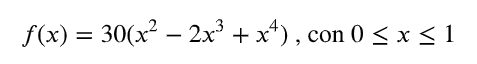

Para generar numeros aleatorios, se utilizara el algoritmo de aceptacion-rechazo, primero obtenemos el maximo de la funcion, que en este caso se encuentra en x = 1/2

[1] 1.875

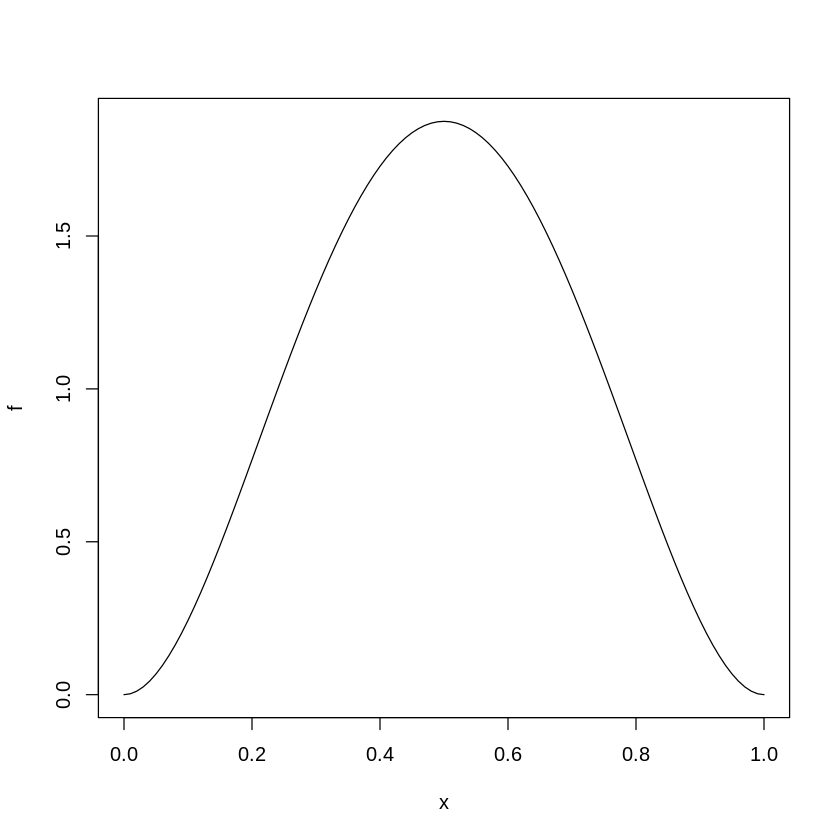

In [ ]:
f<-function(x) 30*(x^2-2*x^3+x^4)
plot(f)
f(1/2)

Por tanto el valor de la c = 1.875

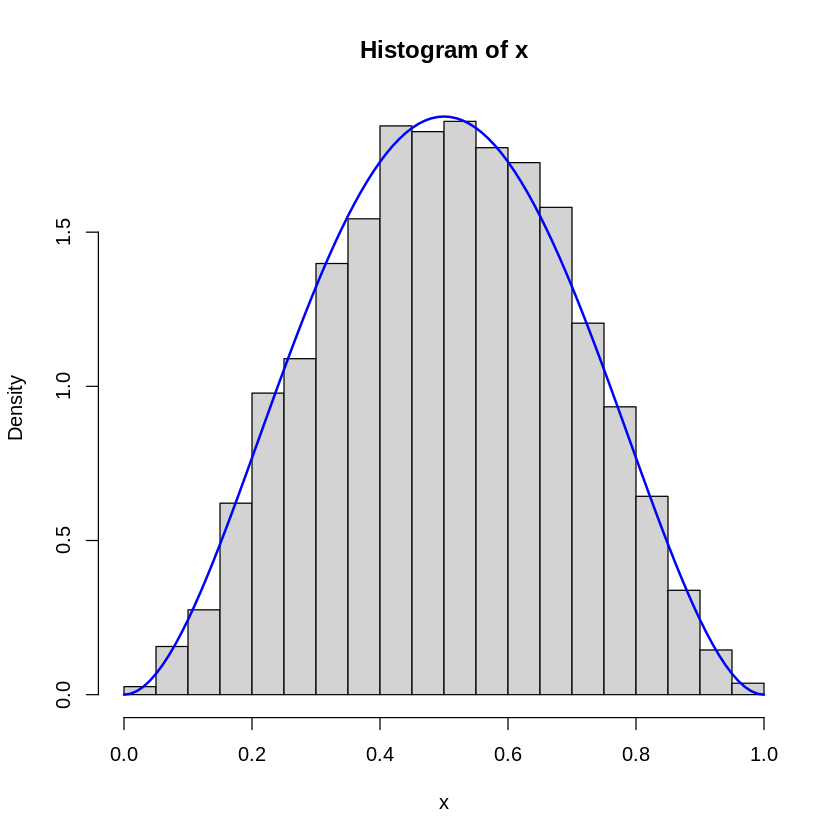

In [ ]:
n <- 10000
c <- 1.875
x <- vector()
for (i in 1:n){
  u <- runif(1)
  xi <- runif(1)
  if (u <= f(xi)/(c)){
    x <- rbind(x,xi)
  }
}

hist(x,freq = F)
plot(f,col = "blue",add = T, lwd = 2)

 2) Los autobuses llegan a un encuentro deportivo de acuerdo con un proceso Poisson a razón de cinco por hora. Con la misma probabilidad, cada autobús puede transportar $20,21,...,40$ aficionados y el número de autobuses distintos es independiente. Simule la llegada de aficionados al encuentro en el instante $ t = 1$ .

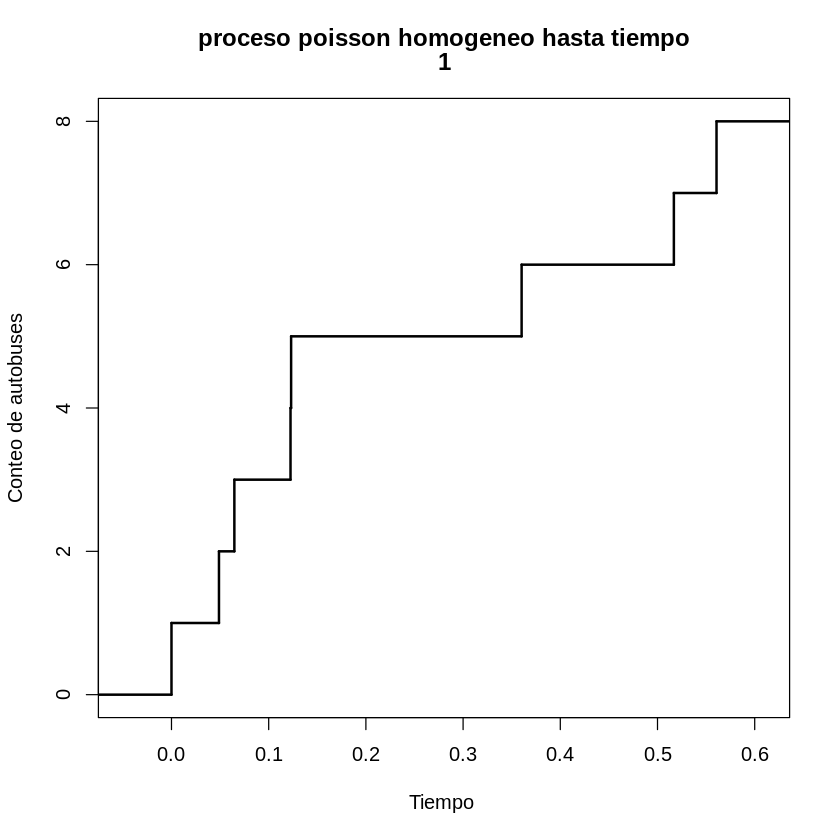

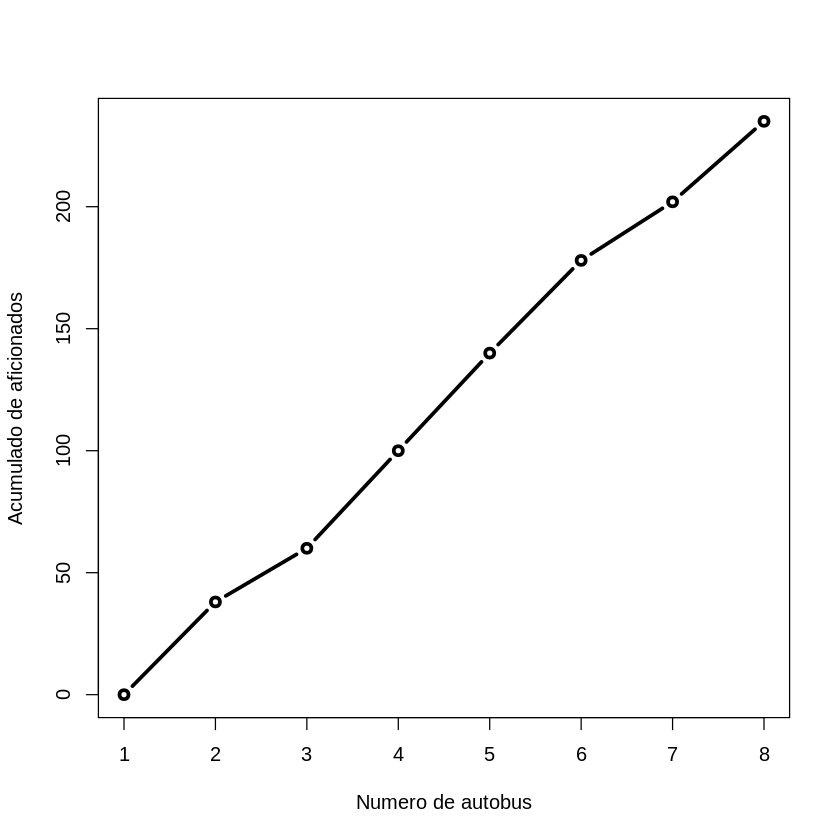

In [ ]:
ppois2 <- function(B,lambda){
  t <- c(0)
  sn <- c(0)
  numA <- c(0)
  repeat{
    u <- runif(1)
    t <- c(t,-1/lambda*log(u))
    
    if (sum(t) < B){
      sn <- c(sn,sum(t))
      sn
      numA <- c(numA, 19 + ceiling(21*runif(1)))
    } else{
      n <- length(t)-1
      break
    }
  }
  plot(stepfun(sn,c(0:n)), do.points = F, xlab = "Tiempo ", ylab="Conteo de autobuses",main = c("proceso poisson homogeneo hasta tiempo",B), lwd = 2)
  plot(cumsum(numA), type = "b", lwd = 3, xlab = "Numero de autobus", ylab = "Acumulado de aficionados")
}

ppois2(1,5)


 3) Emplee simulación para calcular el valor de la integral:

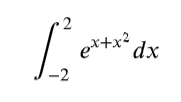

[1] 92.8821

93.16275 with absolute error < 0.00062

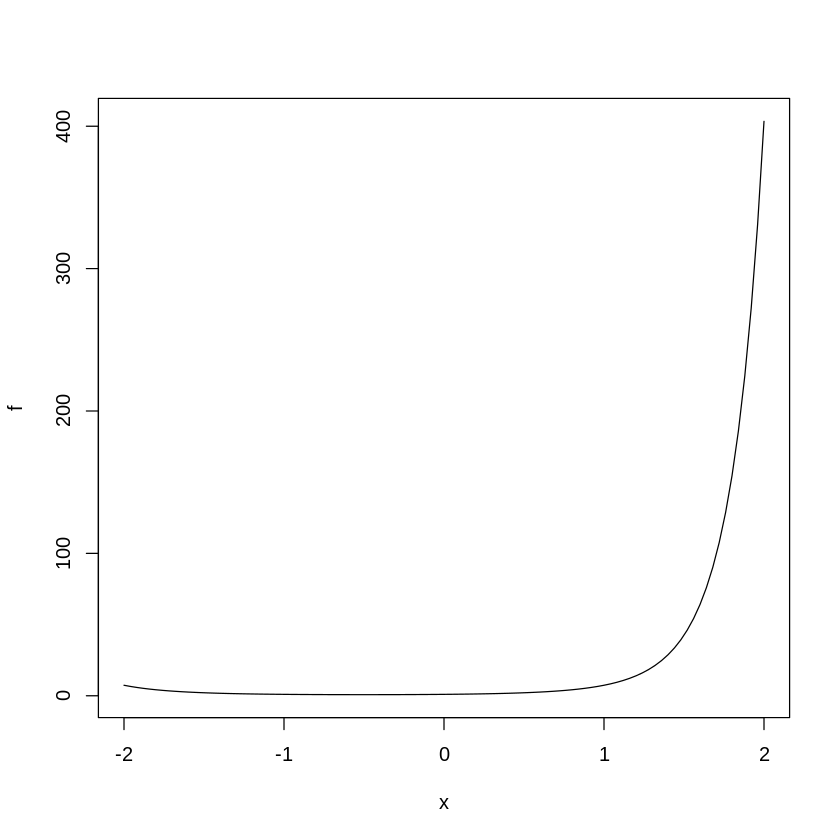

In [ ]:
f <- function(x) exp(x+x^2)
plot(f, xlim = c(-2,2))
Monte.Carlo<-function(f,a,b,n){
  k<-0
  for(i in 1:n){
    k<-k+f(a+(b-a)*runif(1,0,1))  
    }
return(((b-a)/n)*k)
}
Monte.Carlo(f,-2,2,100000)
integrate(f,-2,2)


 4) Emplee el método de rechazo para generar una variable aleatoria con función de densidad $Gamma(3/2,1)$:

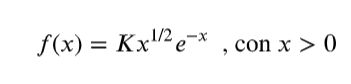

donde $𝐾=1/\Gamma(3/2,1)=2/\sqrt(\pi)$

Se puede utilizar en este caso una distribucion exponencial con parametro $\lambda = 1$ para generar comparaciones (funcion G) y al momento de hacer $f(x)/g(x)$ nos queda $ K * x^{1/2}$.


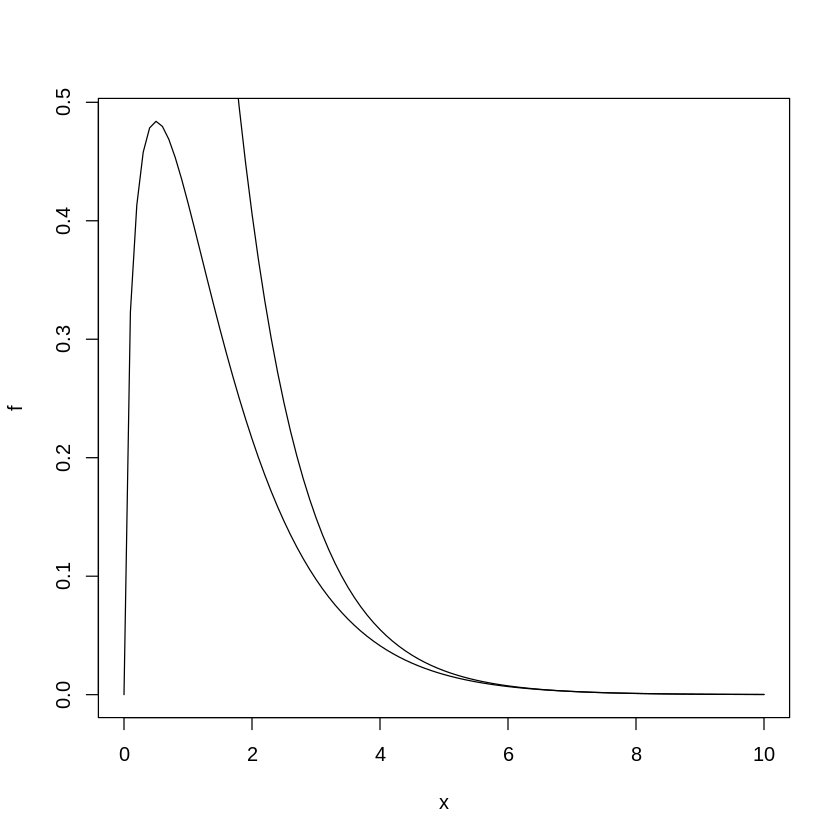

In [ ]:
f<-function(x) 2/sqrt(pi) * sqrt(x) * exp(-x)
plot(f,xlim = c(0,10))
curve(3*exp(-x),add = T)

Se selecciona c = 3 ya que con esa constante se supera la distribucion.

In [ ]:
g <- function(x) exp(-x)
xi <- vector()
n<- 10000
c <- 3
for( i in 1:n){
  u <- runif(1)
  x <- rexp(1,1)
  if (u <= f(x)/(c*g(x))){
    xi <- rbind(xi,x)
  }
}


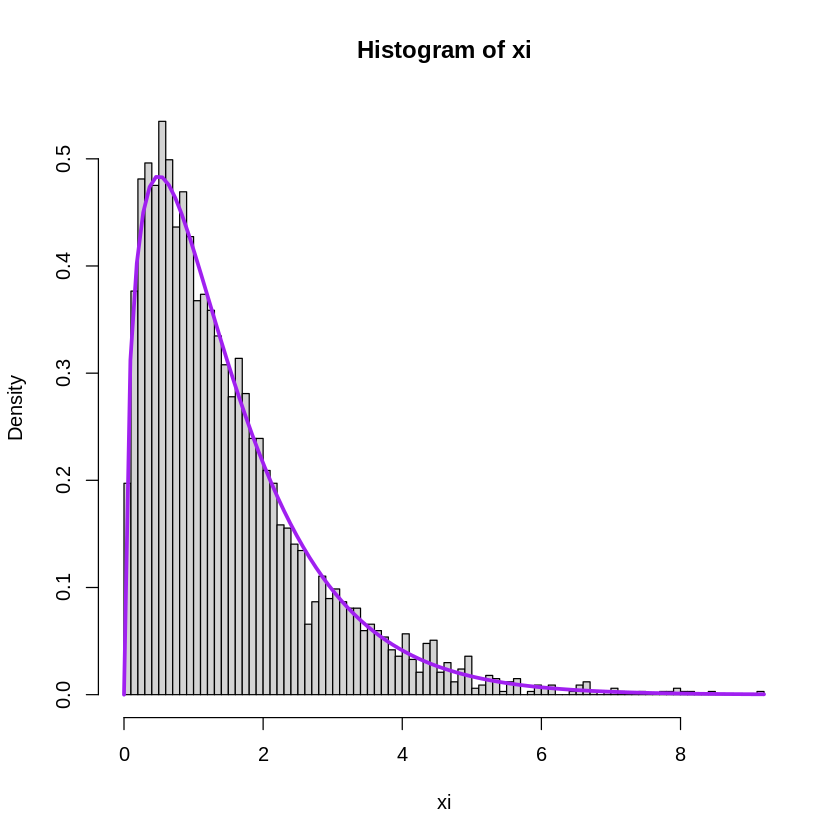

In [ ]:
hist(xi,breaks = 100,freq = F)
curve(f,col = "purple",add = T,lwd = 3)